<a href="https://colab.research.google.com/github/LekanOye/AI-and-ML-Projects/blob/main/Weather_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Weather Prediction using Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstace
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [3]:
dataset = pd.read_csv('/content/seattle-weather.csv')
print (dataset.shape)

(1461, 6)


In [4]:
print (dataset.head(5))

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


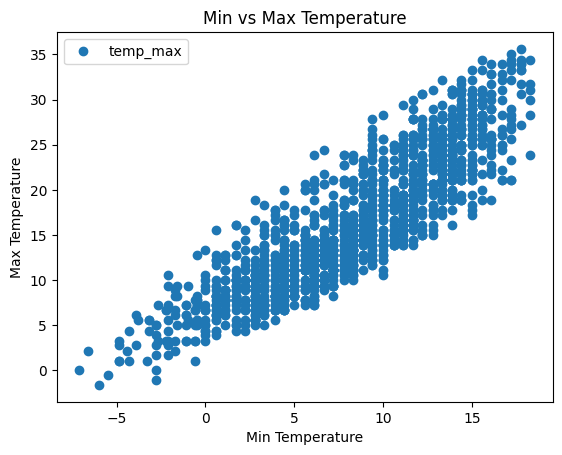

In [6]:
dataset.plot (x='temp_min', y='temp_max', style='o')
plt.title('Min vs Max Temperature')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.show()                      ## to check if this problem can be solved using linear regression

<Figure size 1500x1000 with 0 Axes>

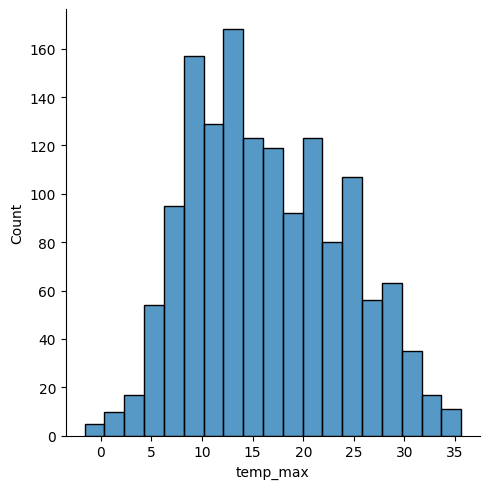

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstace.displot(dataset['temp_max'])
plt.show()


In [11]:
## Data Splicing

## since this is a linear regression, we will be using only 2 variables, temp_min and temp_max.

x = dataset['temp_min'].values.reshape(-1,1)
y = dataset['temp_max'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()   ## call the linear regression class
regressor.fit(x_train, y_train)  ## training the algorithm

print('intercept:', regressor.intercept_)
print('coefficient:', regressor.coef_)

y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print (df)


intercept: [6.00577259]
coefficient: [[1.27128412]]
     Actual  Predicted
0      20.0  21.515439
1      10.6  15.921789
2      14.4  18.718614
3      23.9  15.921789
4      12.8  15.159018
..      ...        ...
288    10.6  11.599423
289    17.2  15.159018
290    22.8  18.718614
291     6.7  10.963781
292    22.8  21.515439

[293 rows x 2 columns]


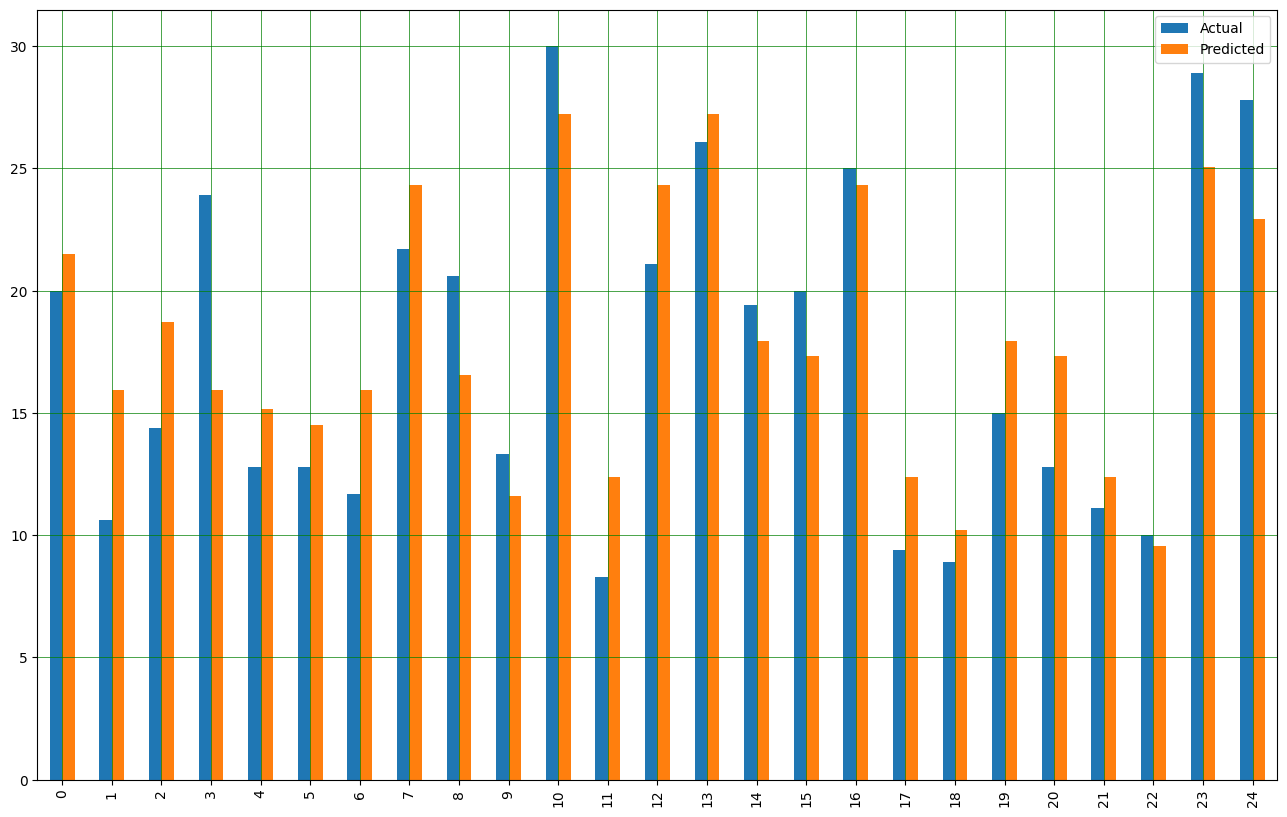

In [12]:
## to show actual vs predicted graphically

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
## To evaluate the performance of the algorithm

print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.814461486372697
Mean Squared Error: 11.89886444956574
Root Mean Squared Error: 3.449473068392583
